In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

In [7]:
df= pd.read_csv('listings.csv')


We will starting engineering the data from http://insideairbnb.com/vancouver/ and seeing in a detail what it comes with this projects.
Although this is a recreational project, I want to be able to obtain and highlight a set of logics that will accompany our final results. 

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5975 non-null   int64  
 1   listing_url                                   5975 non-null   object 
 2   scrape_id                                     5975 non-null   int64  
 3   last_scraped                                  5975 non-null   object 
 4   source                                        5975 non-null   object 
 5   name                                          5975 non-null   object 
 6   description                                   5950 non-null   object 
 7   neighborhood_overview                         3996 non-null   object 
 8   picture_url                                   5975 non-null   object 
 9   host_id                                       5975 non-null   i

We have a lot qualitative data of type string most likely extracted directly from the app without any kind of processing 

I will leave a table with the discripcion of each Parameter 

<table>
  <thead>
    <tr>
      <th>Column</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>host_since</td>
      <td>Date when the host joined the platform</td>
    </tr>
    <tr>
      <td>host_is_superhost</td>
      <td>Whether the host have or not superhost status</td>
    </tr>
    <tr>
      <td>host_has_profile_pic</td>
      <td>Whether the host has a profile picture</td>
    </tr>
    <tr>
      <td>host_identity_verified</td>
      <td>Whether the host has completed identity verification</td>
    </tr>
    <tr>
      <td>latitude</td>
      <td>Latitude of the listing</td>
    </tr>
    <tr>
      <td>longitude</td>
      <td>Longitude of the listing</td>
    </tr>
    <tr>
      <td>accommodates</td>
      <td>Number of guests the listing can accommodate</td>
    </tr>
    <tr>
      <td>bedrooms</td>
      <td>Number of bedrooms in the listing</td>
    </tr>
    <tr>
      <td>beds</td>
      <td>Number of beds in the listing</td>
    </tr>
    <tr>
      <td>price</td>
      <td>Nightly price for the listing</td>
    </tr>
    <tr>
      <td>minimum_nights</td>
      <td>Minimum number of nights required for booking</td>
    </tr>
    <tr>
      <td>maximum_nights</td>
      <td>Maximum number of nights allowed for booking</td>
    </tr>
    <tr>
      <td>minimum_minimum_nights</td>
      <td>Minimum number of nights required for booking for the busiest season</td>
    </tr>
    <tr>
      <td>maximum_minimum_nights</td>
      <td>Maximum number of nights required for booking for the busiest season</td>
    </tr>
    <tr>
      <td>minimum_maximum_nights</td>
      <td>Minimum number of nights allowed for booking for the busiest season</td>
    </tr>
    <tr>
      <td>maximum_maximum_nights</td>
      <td>Maximum number of nights allowed for booking for the busiest season</td>
    </tr>
    <tr>
      <td>minimum_nights_avg_ntm</td>
      <td>Average minimum nights for the upcoming 90 days</td>
    </tr>
    <tr>
      <td>maximum_nights_avg_ntm</td>
      <td>Average maximum nights for the upcoming 90 days</td>
    </tr>
    <tr>
      <td>availability_30</td>
      <td>Number of days the listing is available in the next 30 days</td>
    </tr>
    <tr>
        <td>availability_60</td>
        <td>The number of days the listing is available for booking within the next 60 days</td>
    </tr>
    <tr>
    <td>availability_90</td>
    <td>The number of days the listing is available for booking within the next 90 days</td>
  </tr>
  <tr>
    <td>availability_365</td>
    <td>The number of days the listing is available for booking within the next 365 days</td>
  </tr>
  <tr>
    <td>number_of_reviews</td>
    <td>The total number of reviews for the listing</td>
  </tr>
  <tr>
    <td>number_of_reviews_ltm</td>
    <td>The total number of reviews for the listing in the last 12 months</td>
  </tr>
  <tr>
    <td>number_of_reviews_l30d</td>
    <td>The total number of reviews for the listing in the last 30 days</td>
  </tr>
  <tr>
    <td>first_review</td>
    <td>The date of the first review for the listing</td>
  </tr>
  <tr>
    <td>last_review</td>
    <td>The date of the most recent review for the listing</td>
  </tr>
  <tr>
    <td>review_scores_rating</td>
    <td>The overall rating score for the listing based on all reviews</td>
  </tr>
  <tr>
    <td>review_scores_accuracy</td>
    <td>The rating score for the listing's accuracy based on all reviews</td>
  </tr>
  <tr>
    <td>review_scores_cleanliness</td>
    <td>The rating score for the listing's cleanliness based on all reviews</td>
  </tr>
  <tr>
    <td>review_scores_checkin</td>
    <td>The rating score for the listing's check-in process based on all reviews</td>
  </tr>
  <tr>
    <td>review_scores_communication</td>
    <td>The rating score for the listing's communication based on all reviews</td>
  </tr>
  <tr>
    <td>review_scores_location</td>
    <td>The rating score for the listing's location based on all reviews</td>
  </tr>
  <tr>
    <td>review_scores_value</td>
    <td>The rating score for the listing's value based on all reviews</td>
  </tr>
  <tr>
    <td>license</td>
    <td>The license number of the listing (if applicable)</td>
  </tr>
  <tr>
    <td>instant_bookable</td>
    <td>Whether the listing is available for instant booking</td>
  </tr>
  <tr>
    <td>calculated_host_listings_count</td>
    <td>The total number of listings owned by the host</td>
  </tr>
  <tr>
    <td>calculated_host_listings_count_entire_homes</td>
    <td>The number of entire homes owned by the host</td>
  </tr>
  <tr>
    <td>calculated_host_listings_count_private_rooms</td>
    <td>The number of private rooms owned by the host</td>
  </tr>
  <tr>
    <td>calculated_host_listings_count_shared_rooms</td>
    <td>The number of shared rooms owned by the host</td>
  </tr>
      <tr>
    <td>reviews_per_month</td>
    <td>The average number of reviews per month</td>
  </tr>
  <tr>
    <td>n_bathrooms</td>
    <td>The number of bathrooms in the listing</td>
  </tr>
  <tr>
    <td>bath_shared</td>
    <td>Whether the bathroom is shared with other guests</td>
  </tr>
</table>

We will do some initial exploring data before we start engineering it.

Is easy to see that we are dealing mostly with entire apt/home in our dataset, now lets see how many really are "legal" to operate

In [9]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5975 non-null   int64  
 1   listing_url                                   5975 non-null   object 
 2   scrape_id                                     5975 non-null   int64  
 3   last_scraped                                  5975 non-null   object 
 4   source                                        5975 non-null   object 
 5   name                                          5975 non-null   object 
 6   description                                   5950 non-null   object 
 7   neighborhood_overview                         3996 non-null   object 
 8   picture_url                                   5975 non-null   object 
 9   host_id                                       5975 non-null   i

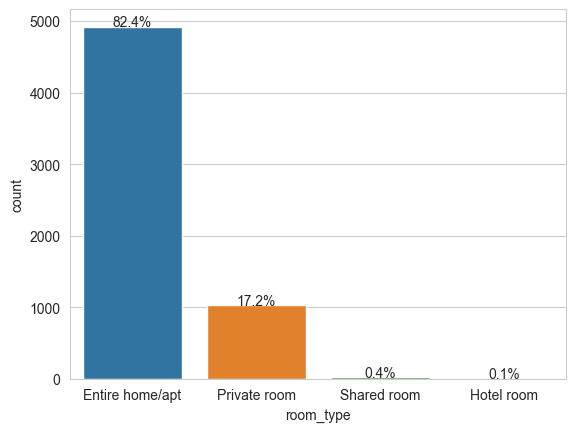

In [12]:
sns.set_style('whitegrid')
ax= sns.countplot(x='room_type', data=df)
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:.1%}'.format(height/total), ha="center")

In [13]:
df.drop('host_location', axis=1, inplace=True)


In [14]:
df.drop('host_about', axis=1, inplace=True)


In [15]:
df.drop(['listing_url','scrape_id','description','id','neighborhood_overview','picture_url','host_id','host_url','host_name'], axis=1, inplace=True)


In [16]:
df.drop(['host_thumbnail_url','host_listings_count','host_total_listings_count','host_picture_url','neighbourhood','neighbourhood_group_cleansed','bathrooms','calendar_updated'], axis=1, inplace=True)


In [17]:
df.drop(['calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [18]:
df.head().columns

Index(['last_scraped', 'source', 'name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_sco

In [19]:
df['host_response_time'].fillna('Unspecified', inplace=True) 
#We will fill both response time and response rate with unspecified for nan data, 
#because this data is representative for what we want to elaborate

In [20]:
df['host_response_rate'].fillna('Unspecified', inplace=True)

In [21]:
df['host_neighbourhood'].isnull().sum() 
#we have 325 nan date for neighbourgood, but is not too representative where the host live so we wil drop it

325

In [22]:
df.drop('host_neighbourhood', axis=1, inplace=True) 

In [23]:
df['bedrooms'].isnull().sum()

335

We have 335 missing data for bedrooms, and I think is a important aspect to consider so :
We will find a good way to fill the missing data for bedrooms, and see how corraleted is with the other columns
Here are 2 important aspect , number of bathrooms , and if shared or private 

In [27]:
import re 
def bathclass(bathrooms):
    # extraer la cantidad de baños sin modificar
    n_bathrooms = re.findall(r'[\d\.]+', str(bathrooms))
    # convertir a un número de coma flotante
    n_bathrooms = float(n_bathrooms[0]) if n_bathrooms else None
    # buscar si el baño es compartido
    bath_shared = True if 'shared' in str(bathrooms).lower() else False
    # devolver los valores como una tupla
    return n_bathrooms, bath_shared



In [28]:
df[['n_bathrooms', 'bath_shared']] = df['bathrooms_text'].apply(lambda x: pd.Series(bathclass(x)))

In [29]:
#We will drop now bathrooms_text since we have the new 2 columns with the information

In [30]:
df.drop('bathrooms_text',axis=1, inplace=True)

In [31]:
#Now lets check again de corr 
df.select_dtypes(include=[np.number]).corr()['bedrooms'].sort_values()[-4:]

n_bathrooms     0.738130
beds            0.833691
accommodates    0.835460
bedrooms        1.000000
Name: bedrooms, dtype: float64

In [32]:
df[['n_bathrooms','accommodates','bedrooms']].isnull().sum()

n_bathrooms      10
accommodates      0
bedrooms        335
dtype: int64

In [33]:
grouped_df = df.groupby(['accommodates','bedrooms'])['n_bathrooms'].mean()
grouped_df= grouped_df.round()
#function to find the accomodates and bedrooms for the nan bathrooms rows and get the mean value from the grouped df
def fill_n_bathrooms(row):
    if pd.isna(row['n_bathrooms']):
        return grouped_df.loc[row['accommodates'], row['bedrooms']]
    else:
        return row['n_bathrooms']

df['n_bathrooms'] = df.apply(fill_n_bathrooms, axis=1)


In [34]:
df['beds'].isnull().sum()

48

In [35]:
#we will just drop the missing info for beds=Nan, since is just 0,8% of the data
df.dropna(subset=['beds'], inplace=True)

In [36]:
#We will do the same for bedrooms that we did for bathrooms but now we include beds 

In [37]:
grouped_df_bedrooms = df.groupby(['accommodates','n_bathrooms','beds'])['bedrooms'].mean()

In [38]:
grouped_df_bedrooms = grouped_df_bedrooms.round()

In [39]:
def fill_n_bedrooms(row):
    if pd.isna(row['bedrooms']):
        return grouped_df_bedrooms.loc[row['accommodates'], row['n_bathrooms'],row['beds']]
    else:
        return row['bedrooms']


In [40]:
df['bedrooms'] = df.apply(fill_n_bedrooms, axis=1)

In [41]:
df[['accommodates', 'n_bathrooms', 'beds']].isnull().sum()


accommodates    0
n_bathrooms     0
beds            0
dtype: int64

In [42]:
df.loc[df['bedrooms'].isnull(), 'bedrooms'] = df['bedrooms'].fillna(1)

In [43]:
df.isnull().sum()

last_scraped                      0
source                            0
name                              0
host_since                        0
host_response_time                0
host_response_rate                0
host_acceptance_rate            854
host_is_superhost                 0
host_verifications                0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bedrooms                          0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
minimum_minimum_nights            0
maximum_minimum_nights            0
minimum_maximum_nights            0
maximum_maximum_nights            0
minimum_nights_avg_ntm      

In [44]:
#We are filling with no license people who didn't provide a number
df['license'] = df['license'].fillna('No license')


In [45]:
df_strings = df.select_dtypes(include='object')


In [46]:
df_strings.columns

Index(['last_scraped', 'source', 'name', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities',
       'price', 'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'license', 'instant_bookable'],
      dtype='object')

In [47]:
#We are converting some strings in dummies variables 

In [48]:
#Property type and room_type are practically sayin the same , we will keep the room_type
df.drop('property_type', axis=1, inplace=True)

In [49]:
#We will drop has_availability since is a data that change every minute and we are not linked to a daily info

In [50]:
df.drop('has_availability', axis=1, inplace=True)

In [51]:
#We will keep host_response_time since is give us a big picture how often we can get a respond from the host 
# and we will drop host_response_rate since we have also missing values there

In [52]:
df.drop('host_response_rate',axis=1,inplace=True)

In [53]:
df.drop('source',axis=1,inplace=True)

In [54]:
df['host_verifications']

0       ['email', 'phone']
1       ['email', 'phone']
2       ['email', 'phone']
3       ['email', 'phone']
4                ['phone']
               ...        
5970    ['email', 'phone']
5971    ['email', 'phone']
5972    ['email', 'phone']
5973    ['email', 'phone']
5974    ['email', 'phone']
Name: host_verifications, Length: 5927, dtype: object

In [55]:
df['host_verificationss'] = df['host_verifications'].str.strip('[]').str.replace("'", '').str.split(', ')


In [56]:
df['host_verificationss']

0       [email, phone]
1       [email, phone]
2       [email, phone]
3       [email, phone]
4              [phone]
             ...      
5970    [email, phone]
5971    [email, phone]
5972    [email, phone]
5973    [email, phone]
5974    [email, phone]
Name: host_verificationss, Length: 5927, dtype: object

In [57]:
dummies = pd.get_dummies(df['host_verificationss'].apply(pd.Series).stack())

In [58]:
dummies = dummies.groupby(level=0).max()

In [59]:
dummies = dummies.add_suffix('host_verification')

In [60]:
df=pd.concat([df,dummies], axis=1)

In [61]:
df.drop(['host_verifications','host_verificationss'], axis=1, inplace=True)

In [62]:
dum_sort = pd.get_dummies(df[['neighbourhood_cleansed','room_type','host_response_time']])

In [63]:
df= pd.concat([df,dum_sort],axis=1)

In [64]:
df.drop(['neighbourhood_cleansed','room_type','host_response_time'], axis=1, inplace=True)

In [65]:
df.drop(['last_scraped','name','calendar_last_scraped'], axis=1, inplace=True)

In [66]:
df.columns

Index(['host_since', 'host_acceptance_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month', 'n_bathrooms', 'bath_shared',
       'emailhost_verification', 'phonehost_verification',
       'photo

In [67]:
df_strings = df.select_dtypes(include='object')

In [68]:
df_strings.isnull().sum()

host_since                   0
host_acceptance_rate       854
host_is_superhost            0
host_has_profile_pic         0
host_identity_verified       0
amenities                    0
price                        0
first_review              1026
last_review               1026
license                      0
instant_bookable             0
dtype: int64

In [69]:
df['host_is_superhost'] = np.where(df['host_is_superhost'] == 't', True, False)

In [70]:
df['host_has_profile_pic'] = np.where(df['host_has_profile_pic'] == 't', True, False)

In [71]:
df['host_identity_verified'] = np.where(df['host_identity_verified'] == 't', True, False)

In [72]:
df['instant_bookable'] = np.where(df['instant_bookable'] == 't', True, False)

In [73]:
df['license'] = np.where(df['license'] == 'No license', False, True)

In [74]:
df['price'] = pd.to_numeric(df['price'].str.replace(',', '').str.replace('$', ''))

In [75]:
df_strings = df.select_dtypes(include='object')

In [76]:
df_strings.isnull().sum()

host_since                 0
host_acceptance_rate     854
amenities                  0
first_review            1026
last_review             1026
dtype: int64

In [77]:
df_copy2 = df.copy()

In [78]:
df=df_copy2.copy()

In [79]:
# df_copy = pd.concat([df_copy,dummies_amenities], axis=1)

In [80]:
df.head(1)

,host_since,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,beds,...,neighbourhood_cleansed_West Point Grey,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_response_time_Unspecified,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour
0,2009-11-07,96%,True,True,True,49.28201,-123.12669,2,1.0,1.0,...,False,True,False,False,False,False,False,False,False,True


In [81]:
df_strings.isnull().sum()

host_since                 0
host_acceptance_rate     854
amenities                  0
first_review            1026
last_review             1026
dtype: int64

In [95]:
#We converter the string host_since into a date value 
df['host_since']= df['host_since'].apply(lambda x: pd.to_datetime(x))

In [83]:
#it seeems that all the missing values for reviews_scores are because there are not not reviews for that property yet, 
# you can check with number_of_reviews == 0 and see that match the NAN value in the other columns
# df.loc[df['number_of_reviews'] == 0 ]['review_scores_rating']

In [84]:
review_columns = ['reviews_per_month','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

for col in review_columns:
    if df.loc[df['number_of_reviews'] == 0, col].isnull().any():
        df.loc[df['number_of_reviews'] == 0, col] = 0

In [85]:
#We wil fill the dates for first review and last review for those that don't have review yet, with old dates so we don't have problem ploting later\
import datetime

In [86]:
df.loc[df['number_of_reviews'] == 0, 'first_review'] = datetime.datetime.strptime('01/01/1900', '%d/%m/%Y').date()
df.loc[df['number_of_reviews'] == 0, 'last_review'] = datetime.datetime.strptime('01/01/1900', '%d/%m/%Y').date()

In [87]:
df[['first_review','last_review']]= df[['first_review','last_review']].apply(lambda x : pd.to_datetime(x))

In [88]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100


In [89]:
df.select_dtypes(include=['float64', 'int64']).corr()['host_acceptance_rate']
df.drop('host_acceptance_rate',axis=1,inplace=True)

In [90]:
df.isnull().sum()

host_since                               0
host_is_superhost                        0
host_has_profile_pic                     0
host_identity_verified                   0
latitude                                 0
                                        ..
host_response_time_Unspecified           0
host_response_time_a few days or more    0
host_response_time_within a day          0
host_response_time_within a few hours    0
host_response_time_within an hour        0
Length: 76, dtype: int64

In [93]:
df.dropna(inplace=True)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5914 entries, 0 to 5974
Data columns (total 76 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   host_since                                       5914 non-null   datetime64[ns]
 1   host_is_superhost                                5914 non-null   bool          
 2   host_has_profile_pic                             5914 non-null   bool          
 3   host_identity_verified                           5914 non-null   bool          
 4   latitude                                         5914 non-null   float64       
 5   longitude                                        5914 non-null   float64       
 6   accommodates                                     5914 non-null   int64         
 7   bedrooms                                         5914 non-null   float64       
 8   beds                                       

In [97]:
df.to_csv('/Users/bigfoot/Documents/airbnb-van/data_airbnb_engineered.csv', index=False)